In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
sns.set() # устанавливаем seaborn как по-умолчанию для отрисовки графиков

import statistics
#DataSet Split
from sklearn.model_selection import TimeSeriesSplit
#Gradient Boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split

In [391]:
X = pd.read_csv('Data/new_date_riverV1.csv',parse_dates=["date"])
X = X.drop(['Unnamed: 0'],axis=1)

In [392]:
X = X.drop(['w_forecast_d2','w_forecast_d3','w_forecast_d4','w_forecast_d5',
           'w_forecast_d6','w_forecast_d7','w_forecast_d8','w_forecast_d9',
            'w_forecast_d10','w_forecast_d11','w_forecast_d12','w_forecast_d13','w_forecast_d14'
           ], axis=1)


In [393]:
# превратим дату в индекс и сделаем изменение постоянным
X.set_index('date', inplace = True)

In [394]:
# рассчитаем скользящее среднее для трех месяцев
X.rolling(window = 5).mean()

,snow_height,degree_coverage,tmean,post_9387,pasday1,pasday2,pasday3,pasday4,pasday5,pasday6,...,pasday14,pas_level1,pas_level2,pas_level3,pas_level4,pas_level5,pas_level6,pas_level7,day_of_year,w_forecast_d1
date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-05,38.0,10.0,-29.66,78.8,-28.72,-25.38,-25.00,-28.10,-30.04,-30.40,...,-46.16,70.0,61.0,52.0,43.0,34.0,34.0,34.0,3.0,-31.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,42.0,10.0,-34.16,34.0,-38.54,-43.18,-45.90,-47.14,-46.16,-42.60,...,-28.32,34.0,34.0,34.0,34.0,34.0,34.0,34.2,359.0,-39.84
2021-12-28,42.0,10.0,-32.42,34.0,-34.16,-38.54,-43.18,-45.90,-47.14,-46.16,...,-33.52,34.0,34.0,34.0,34.0,34.0,34.0,34.0,360.0,-40.06
2021-12-29,42.0,10.0,-32.02,34.0,-32.42,-34.16,-38.54,-43.18,-45.90,-47.14,...,-38.86,34.0,34.0,34.0,34.0,34.0,34.0,34.0,361.0,-40.36


In [395]:
# # # зададим размер графика
# plt.figure(figsize = (15,8))
# temp2008 = X['2008-01-01':'2008-12-31']
    
# # поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
# plt.plot(temp2008['post_9387'], label = 'Уровень 9387 за 2008', color = 'steelblue')
# plt.plot(temp2008['post_9387'].rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
 
# # добавим легенду, ее положение на графике и размер шрифта
# plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# # добавим подписи к осям и заголовки
# plt.xlabel('Месяцы', fontsize = 14)
# plt.ylabel('Уровень', fontsize = 14)
# plt.title('Уровень поста 9387(Ванавара) за 2008', fontsize = 16)
 
# # выведем обе кривые на одном графике
# plt.show()


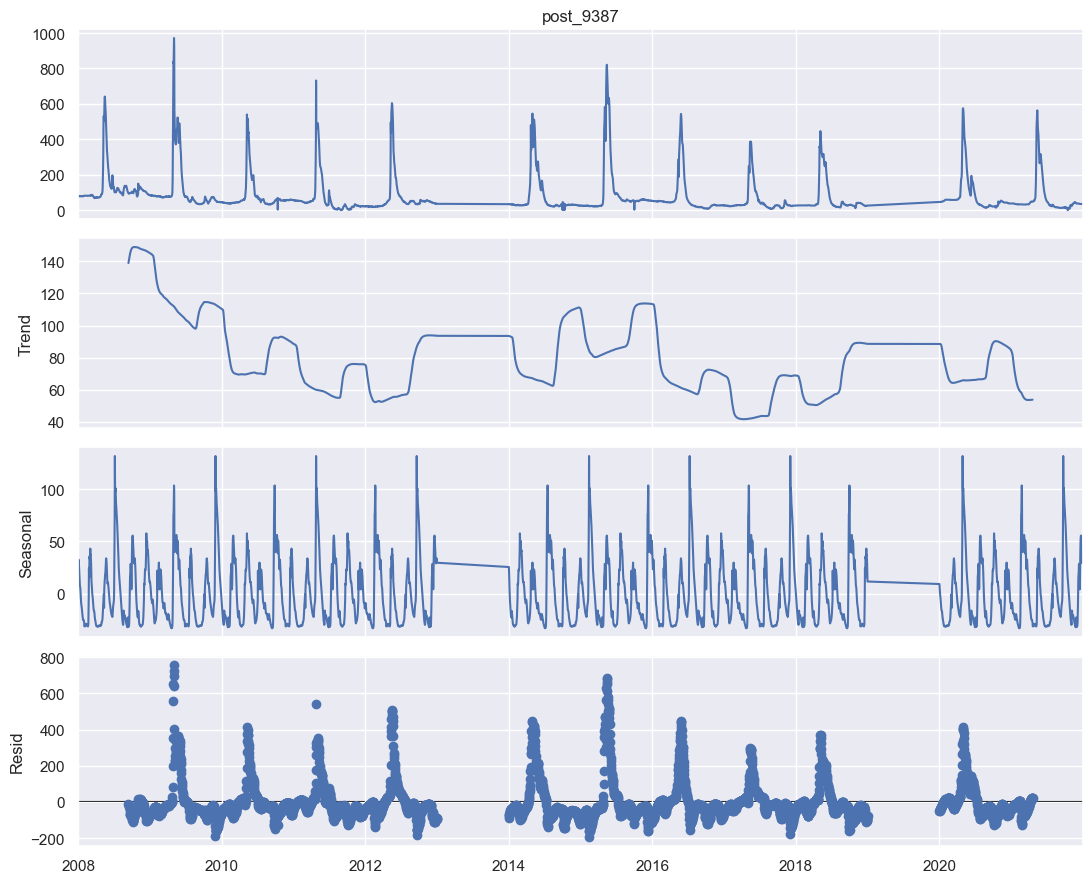

In [396]:
# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
  
#применяем функцию к данным о перевозках
decompose = seasonal_decompose(X['post_9387'],period=512)
decompose.plot()
 
plt.show()

In [397]:
# corr_matrix=X.corr()
# mask = np.zeros_like(corr_matrix)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr_matrix, mask=mask, square=True)

In [399]:
#y = X["post_9387"]
#X = X.drop("post_9387", axis="columns")

X_test = X['2018-01-01':'2018-12-31']['post_9387']


X_train = X['2014-01-01' : '2017-12-31']['post_9387']


# импортируем необходимую функцию 
from statsmodels.tsa.stattools import adfuller
 
# передадим ей столбец с данными о перевозках и поместим результат в adf_test
adf_test = adfuller(X_train)
# выведем p-value
print(f"p-value = { adf_test[1]:.15f}")

p-value = 0.000025375580830


In [491]:
# обучим модель с соответствующими параметрами, SARIMAX(3, 0, 0)x(0, 1, 0, 12)
# импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX

# создадим объект этой модели
model = SARIMAX(X_train, order = (3, 0, 0), seasonal_order = (0, 2, 3 , 3))
 
# применим метод fit
result = model.fit()

C:\Users\Rhino\.conda\envs\Rhino\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Rhino\.conda\envs\Rhino\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [492]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(X_train)
 
# и закончится в конце тестового
end = len(X_train) + len(X_test) - 1
  
# применим метод predict
predictions = result.predict(start, end)
predictions

2018-01-01    25.455700
2018-01-02    25.970575
2018-01-03    26.949526
2018-01-04    27.781322
2018-01-05    28.570970
                ...    
2018-12-27    68.144423
2018-12-28    68.019397
2018-12-29    68.187935
2018-12-30    68.144823
2018-12-31    68.019787
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

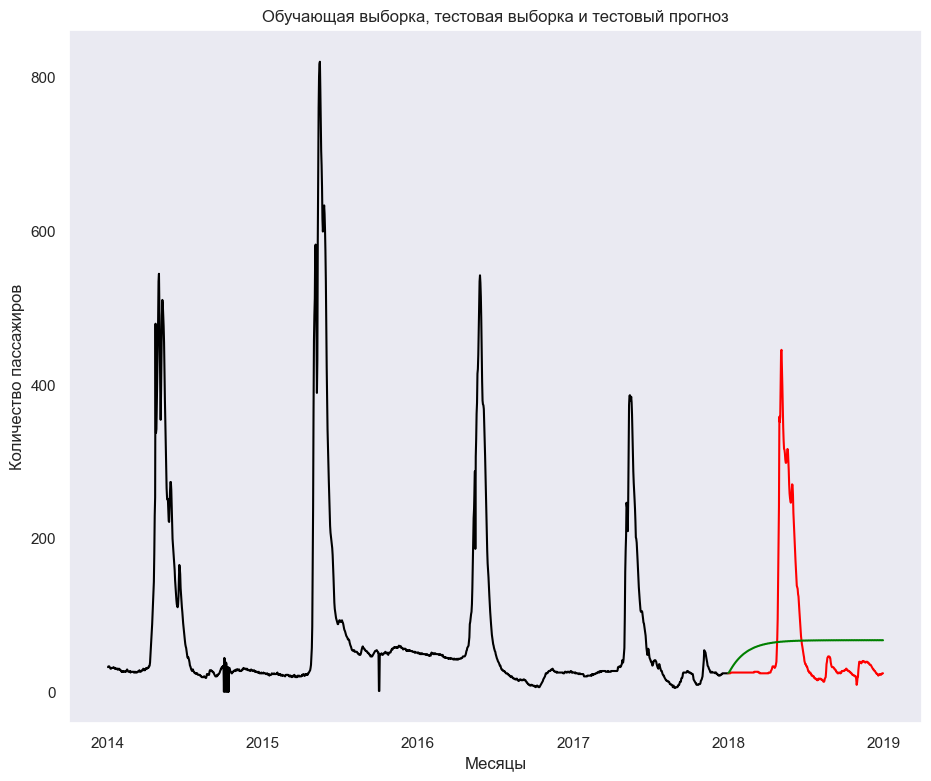

In [493]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(X_train, color = "black")
plt.plot(X_test, color = "red")
plt.plot(predictions, color = "green")
 
# заголовок и подписи к осям
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()